Uses aditionally ProtoNet

SiLU activation function

Three-layer network made up of 2D convolution, concats all the layers finally

Upsampling is done with nearest instead of bilinear

80 class labels, 4 bounding box coordinates, 1 confidence score, 32 mask outputs-  351 output channels

In [1]:
import matplotlib.pyplot as plt
import os
import glob
import requests
import zipfile

In [2]:
def download_file(url, save_name):
    url = url
    if not os.path.exists(save_name):
        file = requests.get(url)
        open(save_name, 'wb').write(file.content)
        
download_file(
    'https://www.dropbox.com/s/80y1ebk254d2ypg/images.zip?dl=1',
    'images.zip'
)

In [3]:
# Unzip the data file
def unzip(zip_file=None):
    try:
        with zipfile.ZipFile(zip_file) as z:
            z.extractall("./")
            print("Extracted all")
    except:
        print("Invalid file")

unzip('images.zip')

Extracted all


In [4]:
if not os.path.exists('yolov5'):
    !git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 14927, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 14927 (delta 7), reused 13 (delta 3), pack-reused 14908
Receiving objects: 100% (14927/14927), 14.01 MiB | 3.40 MiB/s, done.
Resolving deltas: 100% (10246/10246), done.


In [5]:
%cd yolov5/

/content/yolov5


In [6]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.6 MB/s eta 0:00:00


In [8]:
#yolov5 nano segmentation model
!python segment/predict.py --weights yolov5n-seg.pt --source images/ --name yolov5n_seg --exist-ok

segment/predict: weights=['yolov5n-seg.pt'], source=images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=yolov5n_seg, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5n-seg summary: 224 layers, 1986637 parameters, 0 gradients, 7.1 GFLOPs
image 1/4 /content/yolov5/images/image_1.jpg: 448x640 19 persons, 11.8ms
image 2/4 /content/yolov5/images/image_2.jpg: 384x640 20 persons, 6 cars, 3 buss, 1 truck, 1 traffic light, 12.2ms
image 3/4 /content/yolov5/images/image_3.jpg: 384x640 2 persons, 1 skis, 7.9ms
image 4/4 /content/yolov5/images/image_4.jpg: 448x640 13 perso

In [9]:
# Plot and visualize images in a 2x2 grid.
def visualize(result_dir):
    """
    Function accepts a list of images and plots
    them in a 2x2 grid.
    """
    plt.figure(figsize=(20, 12))
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    for i, image_name in enumerate(image_names):
        image = plt.imread(image_name)
        plt.subplot(2, 2, i+1)
        plt.imshow(image)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

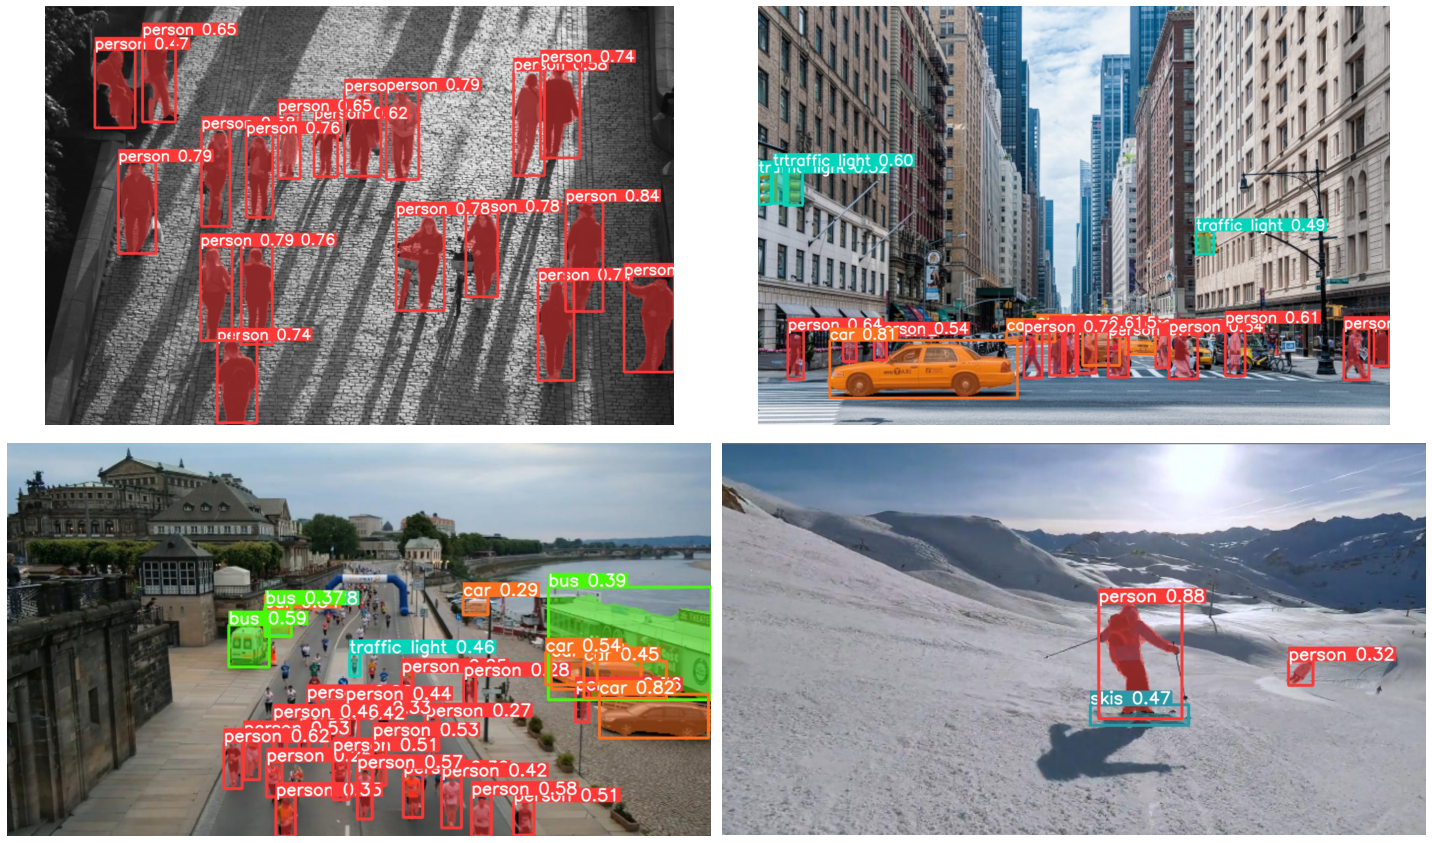

In [10]:
visualize('runs/predict-seg/yolov5n_seg/')

In [11]:
!python segment/predict.py --weights yolov5x-seg.pt --source images/ --name yolov5x_seg --exist-ok

segment/predict: weights=['yolov5x-seg.pt'], source=images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=yolov5x_seg, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

100% 170M/170M [00:02<00:00, 65.7MB/s]

Fusing layers... 
YOLOv5x-seg summary: 455 layers, 88774445 parameters, 0 gradients, 265.7 GFLOPs
image 1/4 /content/yolov5/images/image_1.jpg: 448x640 20 persons, 7 handbags, 84.2ms
image 2/4 /content/yolov5/images/image_2.jpg: 384x640 25 persons, 9 cars, 1 bus, 3 trucks, 7 potted plants, 38.4ms
image 3/4 /content/yolov5/images/image_3.jpg: 384x640 3 persons, 1 backpack, 1 skis, 3

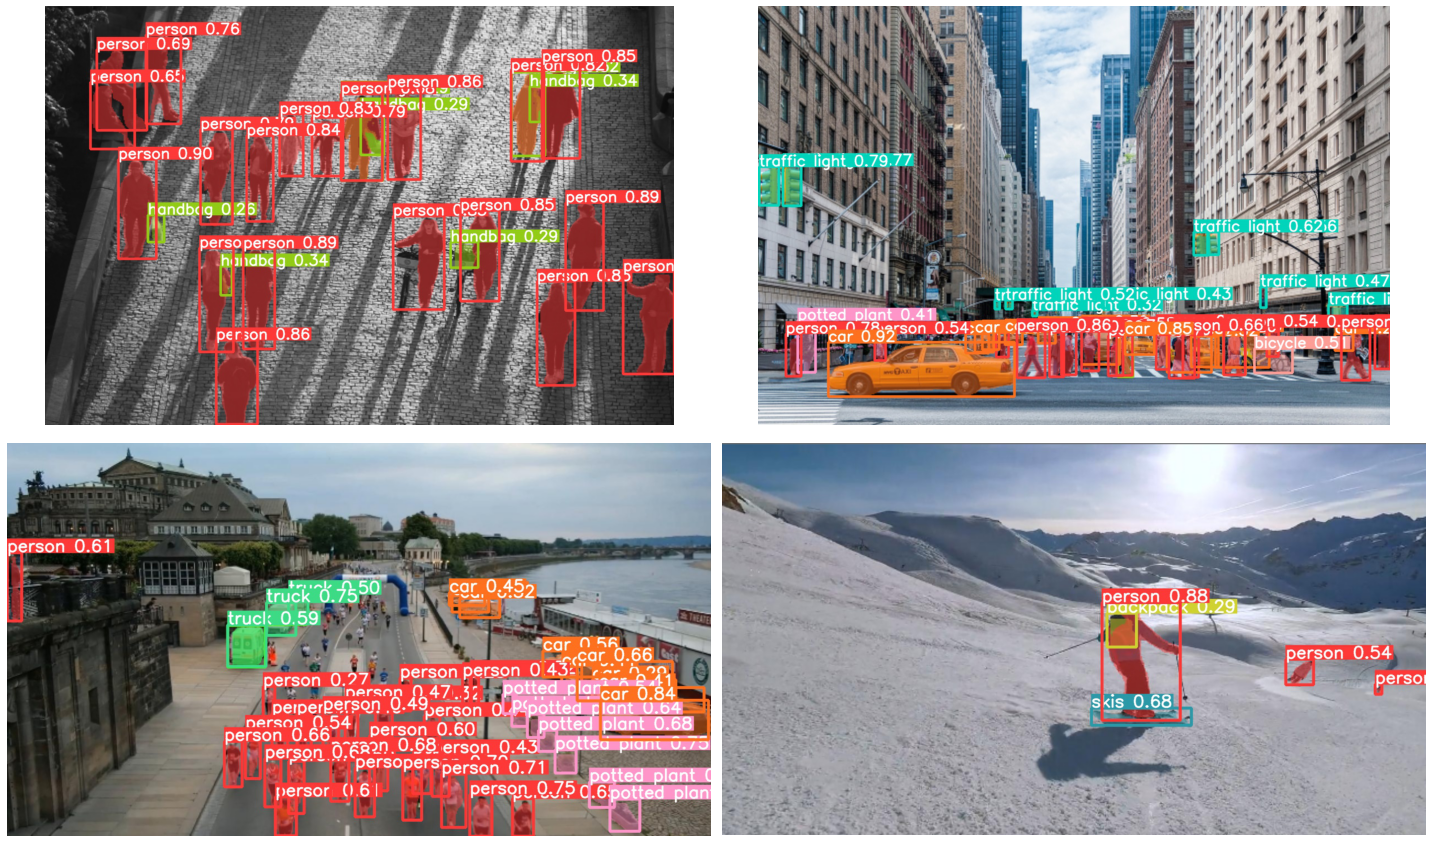

In [12]:
visualize('runs/predict-seg/yolov5x_seg/')

In [13]:
!python segment/predict.py --weights yolov5x-seg.pt --source images/ --name yolov5x_seg_retina_masks --exist-ok --retina-masks

segment/predict: weights=['yolov5x-seg.pt'], source=images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=yolov5x_seg_retina_masks, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=True
YOLOv5 🚀 v7.0-56-gc0ca1d2 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5x-seg summary: 455 layers, 88774445 parameters, 0 gradients, 265.7 GFLOPs
image 1/4 /content/yolov5/images/image_1.jpg: 448x640 20 persons, 7 handbags, 64.9ms
image 2/4 /content/yolov5/images/image_2.jpg: 384x640 25 persons, 9 cars, 1 bus, 3 trucks, 7 potted plants, 41.9ms
image 3/4 /content/yolov5/images/image_3.jpg: 384x640 3 persons, 1 backpack, 1 skis, 35.0ms
image 4/4 /content/yol

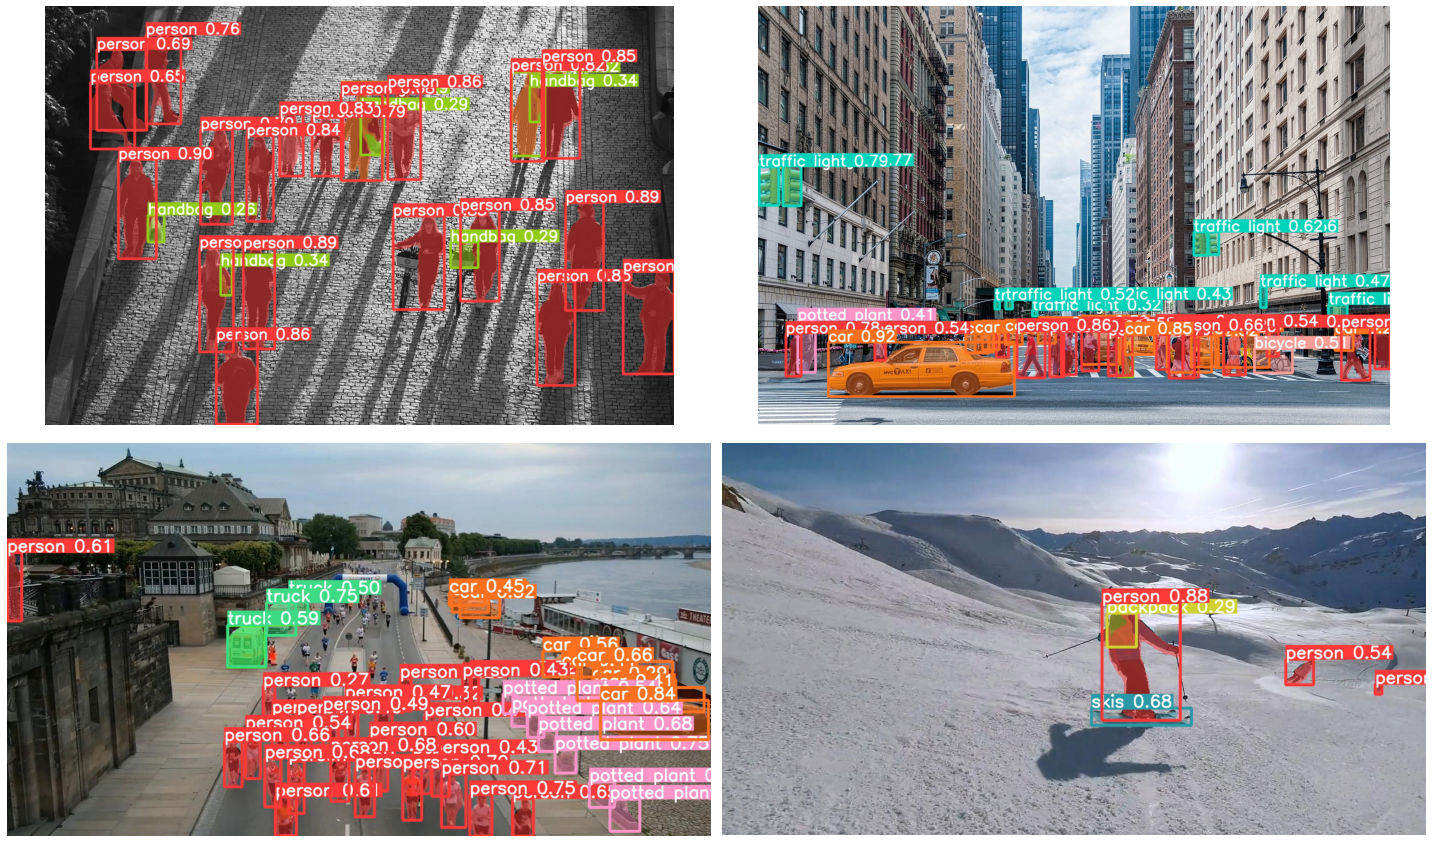

In [14]:
visualize('runs/predict-seg/yolov5x_seg_retina_masks/')